Zalecamy nie czytać notatników na githubie, ze względu na źle wyświetlające się wizualizacje i brak możliwości uruchamiania kodu. Polecamy otworzyć notatnik w google colab.

#**Olimpiada AI - kurs wprowadzający 2025 - Wykład 001D**

"Wektory, macierze  w Numpy"

### Kod do wizualizacji, nie trzeba go czytać (polecamy zwinąć komórkę)

In [ ]:


import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# -----------------------
# Visualization Code
# -----------------------

def plot_vector_sum(a, b):
    # Create a figure with arrows for vectors
    plt.figure(figsize=(6, 6))
    plt.grid(True)
    sstr = lambda x: f'({x[0]}, {x[1]})'

    # Plot vectors as arrows
    # Vector v
    plt.quiver(0, 0, *a, angles='xy', scale_units='xy', scale=1, color='r', label=f'a = {sstr(a)}')
    plt.plot(a[0], a[1], 'bo')  # Ending position of vector v as a blue dot
    # Vector w, shifted to the end of vector v
    plt.quiver(*a, *b, angles='xy', scale_units='xy', scale=1, color='r', label=f'b = {sstr(b)}')
    # Ending position of the sum of vectors as a blue dot
    plt.plot(*(a + b), 'bo')
    # Resultant sum of vectors as an arrow
    plt.quiver(0, 0, *(a + b), angles='xy', scale_units='xy', scale=1, color='g', label=f'a + b = {sstr(a + b)}')

    # Set axis limits
    plt.xlim(0, 5)
    plt.ylim(0, 5)

    # Add legend
    plt.legend()

    # Show plot
    plt.show()


# Plot the rotations
def plot_rotations_as_arrows(v, vectors_rotated):
    # Create figure and axes for the animation
    fig, ax = plt.subplots(figsize=(6, 6))

    # Function to update each frame of the animation
    def update(frame):
        ax.clear()
        ax.grid(True)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        # Original vector
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original v')
        # Rotated vector
        rotated_v = vectors_rotated[frame]
        ax.quiver(0, 0, rotated_v[0], rotated_v[1], angles='xy', scale_units='xy', scale=1, color='g',
                  label=f'Rotated v')
        ax.legend()

    # Initialize the animation
    ani = FuncAnimation(fig, update, frames=len(vectors_rotated), repeat=True)

    # Display the animation as interactive JSHTML
    plt.close(fig)  # This prevents Matplotlib from displaying the static image
    return HTML(ani.to_jshtml())


def plot_rotations_as_points(vectors_rotated):
    # Create figure and axes for the animation
    fig, ax = plt.subplots(figsize=(6, 6))

    # Function to update each frame of the animation
    def update(frame):
        ax.clear()
        ax.grid(True)
        ax.set_xlim(-7, 7)
        ax.set_ylim(-7, 7)
        # Draw the circle
        circle = plt.Circle((2, 2), 1, color='b', fill=False)
        ax.add_artist(circle)
        # Original points
        ax.scatter([2], [2], color='r')  # Plot the center
        ax.scatter(vectors_rotated[frame][:, 0], vectors_rotated[frame][:, 1], color='g')  # Plot rotated points

    # Initialize the animation
    ani = FuncAnimation(fig, update, frames=len(vectors_rotated), repeat=True)

    # Display the animation as interactive JSHTML
    plt.close(fig)  # This prevents Matplotlib from displaying the static image
    return HTML(ani.to_jshtml())

def animate_transformations(transformed_datasets):
    """Create and display an animation of the transformed datasets."""
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)

    scatter_plot = ax.scatter(transformed_datasets[0][:, 0], transformed_datasets[0][:, 1], color='blue')
    ax.set_title('Animacja skalowania wzdłuż osi x')
    text = ax.text(0.5, -3.5, '', ha='center', va='center', fontsize=12, color='red')

    def update(frame):
        scatter_plot.set_offsets(transformed_datasets[frame])
        return scatter_plot, text,

    ani = FuncAnimation(fig, update, frames=range(len(transformed_datasets)), blit=True, repeat=True)
    plt.close(fig)  # This prevents Matplotlib from displaying the static image
    return HTML(ani.to_jshtml())



## 1. Wektory

O wektorach można myśleć na dwa sposoby:

1. Fizycznie: Jako strzałki w przestrzeni, które mają określony kierunek i długość. Przykładem może być sytuacja, kiedy przechodzisz z punktu A do punktu B. Kierunek Wwojego ruchu oraz przebyta odległość mogą być reprezentowane przez wektor. Jeśli idziesz 5 metrów na wschód, możemy to opisać jako wektor $(5,0)$ wskazujący na wschód o długości 5 metrów. Na odwrót, pokonanie 5 metrów w kierunku zachodnim opisać można wektorem $(-5,0)$.

2. Matematycznie: Jako ciąg liczb, które określają długość wektora w każdym z wymiarów przestrzeni. Na przykład, wektor (3, 4) w układzie współrzędnych oznacza, że rozpoczynając w punkcie (0,0) – środku układu współrzędnych – przesuwamy się o 3 jednostki w prawo (wzdłuż osi x) i 4 jednostki w górę (wzdłuż osi y). To tworzy wektor kończący się w punkcie (3, 4).

Choć najłatwiej jest wyobrażać sobie wektory w dwuwymiarowej przestrzeni (2D, jak strzałki na kartce) lub w trójwymiarowej (3D, strzałki w przestrzeni), możemy również rozważać wektory w przestrzeniach o dowolnej liczbie wymiarów, jak na przykład ciąg liczb $(1, 3, 1, -1)$.

**UWAGA:** długość i liczba wymiarów wektora to nie to samo! Np. wektor $(3, 4)$ ma dwa wymiary, ale jego długość to z Twierdzenia Pitagorasa $\sqrt{3^2 + 4^2} = 5$.

Wektory są kluczowe w matematyce i fizyce, ponieważ umożliwiają zrozumienie i obliczanie różnorodnych zjawisk w naukach przyrodniczych i technice. Aby pracować z wektorami w Pythonie, używamy biblioteki o nazwie `numpy`, która jest bardzo popularna wśród naukowców i inżynierów. Poniżej przedstawimy, jak możemy zdefiniować wektory i wykonać na nich proste operacje.



### **Dodawanie wektorów**

Dodawanie wektorów jest równoznaczne z dodaniem ich odpowiednich składowych. Na przykład, suma wektorów `a` i `b` definiowana jest jako

$$ \begin{pmatrix}c_1 \\ c_2\end{pmatrix} = c = a + b = \begin{pmatrix}a_1  \\ a_2 \end{pmatrix} + \begin{pmatrix} b_1 \\  b_2\end{pmatrix}= \begin{pmatrix}a_1 + b_1 \\ a_2 + b_2\end{pmatrix}.$$

W `numpy` dodawanie wygląda bardzo prosto:


In [ ]:
# Definiujemy dwa dwuwymiarowe wektory a i b numpy
a = np.array([1, 2])
b = np.array([3, 1])

c = a + b
print("Wynik dodawania a + b:", c)

Wynik dodawania a + b: [4 3]


Oto wizualizacja powyższego:

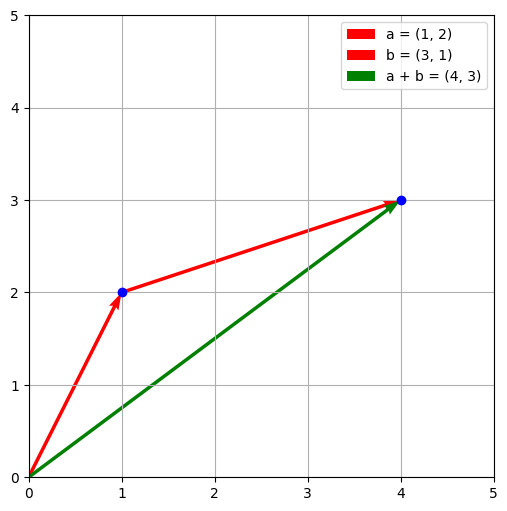

In [ ]:
plot_vector_sum(a, b)  # Wizualizujemy sumę wektorów a i b

### **Mnożenie wektora przez liczbę**

Mnożenie wektora przez liczbę polega na pomnożeniu każdej składowej wektora. Na przykład, jeśli chcemy pomnożyć wektor `a` przez `3`, wynik będzie wyglądał następująco:

$ d = 3 \cdot a = [3 \cdot a_1, 3 \cdot a_2] $

Przykład w `numpy`:


In [ ]:
d = 3 * a
print("a =", a)
print("3 * a:", d)

a = [1 2]
3 * a: [3 6]


### **Iloczyn skalarny wektorów**

Dla dwóch wektorów $\mathbf{a} = (a_1, a_2, a_3)$ i $\mathbf{b} = (b_1, b_2, b_3)$ ich iloczyn skalarny to $\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + a_3 \cdot b_3$.

Możemy mnożyć skalarnie tylko dwa wektory o tej samej liczbie wymiarów. Przykład w `numpy`:


In [ ]:
a = np.array([1, 2, -1, 3])
b = np.array([-1, 0, 2, 2])

np.dot(a, b)  # upewnij się że rozumiesz skąd się wziął wynik!

3

Iloczyn skalarny jest jednym z najistotniejszych pojęć w Machine/Deep Learningu. W swoim czasie powstanie cały wykład dotyczący tego pojęcia. Natomiast na obecną chwilę chcemy o nim powiedzieć w kontekście tego, że Numpy pozwala również na inne mnożenie wektorów. Operacje mnożenia w NumPy istnieją, bo niesamowicie usprawniają pracę, jednak są zdefiniowane zupełnie inaczej niż iloczyn skalarny.
Podkreślmy więc jeszcze raz:
**Uwaga** Z mnożeniem wektorów w NumPy należy być bardzo ostrożnym.

In [ ]:
a = np.array([1, 2, -1, 3])
b = np.array([-1, 0, 2, 2])
a * b

array([-1,  0, -2,  6])

In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(10,1)
b = np.array([1,2,3,4,5,6,7,8,9,10])
print("a to:\n", a)
print("b to:\n", b)
print("a * b to:\n", a * b)

a to:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
b to:
 [ 1  2  3  4  5  6  7  8  9 10]
a * b to:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]



## 2. Macierze



Macierz to prostokątna tablica liczb. Macierz $2\times 2$, która składa się z elementów $a, b, c, d$ jest zapisywana jako:

$$
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
$$

Oczywiście macierze mogą też mieć inne wymiary:

In [ ]:
array_2d = np.array(
  [
    [1,  2,  3,  4,  5 ],
    [6,  7,  8,  9,  10],
    [11, 12, 13, 14, 15]
  ]
)
array_2d

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

Możemy też rozważać tablice o większej **liczbie wymiarów** niż macierz:

In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(10,1)
b = np.array([1,2,3,4,5,6,7,8,9,10])
ab = a*b
print("wymiar a*b to:", (ab).shape)

wymiar a*b to: (10, 10)


In [ ]:
c = np.array([1,2])
abc = ab.reshape(1,10,10) * c.reshape(2,1,1)
print("wymiar abc to", abc.shape)
abc

wymiar abc to (2, 10, 10)


array([[[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
        [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
        [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
        [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
        [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
        [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
        [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
        [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
        [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]],

       [[  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
        [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
        [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
        [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
        [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
        [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120],
        [ 14,  28,  42,  56,  70,  84,

Do poszczgólnych komórek można się odwoływać za pomocą indeksów (indeksujemy od 0), np:

In [ ]:
abc[0,0,0]

1

In [ ]:
abc[1,1,1]

8

In [ ]:
abc[1,2,2], abc[1, 2, 3]

(18, 24)

Jednocześnie macierz umożliwia bardzo łatwy dostęp do poszczególnych podmacierzy:

In [ ]:
abc[:,1,1], abc[0,:,:], abc[1,:,:]

(array([4, 8]),
 array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
        [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
        [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
        [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
        [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
        [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
        [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
        [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
        [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]]),
 array([[  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
        [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
        [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
        [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
        [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
        [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120],
        [ 14,  28,  42

Dodatkowym błogosławieństwem NumPy jest to, że można jednocześnie indeksować tablice liczbami ujemnymi, co oznacza numerowanie od końca:

In [ ]:
abc[:,-1,-1]

array([100, 200])


### **Mnożenie macierzy przez wektor**

Powyższe operacje mnożenia były wygodnymi operacjami w NumPy.
Jednak tak samo, jak w odróżnieniu od nich *iloczyn skalarny* jest osobną i niesamowicie ważną operacją, tak i mnożenie macierzy przez zarówno wektor jak i macierz jest fundamentalną operacją, na której opartych jest wiele gałęzi matematyki.

**Ciekawostka** Jednym z centralnych konceptów sieci neuronowej Transformer, na której oparty jest ChatGPT, jest właśnie iloczyn skalarny. Ale dokładnie to omówimy w dalszych częściach naszego cyklu wykładów.

Wracając, dla macierzy $2x2$ $A$ i wektora dwuelementowego $\mathbf{v}$, wzór na tę operację jest taki:

$$
A \cdot \mathbf{v} = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}
= \begin{pmatrix}
ax + by \\
cx + dy
\end{pmatrix}
$$


In [ ]:
A = np.array([[1, 2], [3, 4]])
v = np.array([[1], [1]])
A, v, A @ v

(array([[1, 2],
        [3, 4]]),
 array([[1],
        [1]]),
 array([[3],
        [7]]))

Jednocześnie należy uważać, jaki `shape` ma wektor `v` albowiem może zmienić `shape` wyniku:

In [ ]:
A = np.array([[1, 2], [3, 4]])
v_T = np.array([1, 1])
A, v_T, A @ v_T

(array([[1, 2],
        [3, 4]]),
 array([1, 1]),
 array([3, 7]))

A także należy uważać, czy najpierw mnożymy przez wektor a później przez macierz.

In [ ]:
# poniższa operacja się nie powiedzie, ze względu na nieprzystające wymiary wektora v i macierzy A
try:
    A = np.array([[1, 2], [3, 4]])
    v = np.array([[1], [1]])
    A, v, v @ A
except Exception as e:
    print(e)

matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)


In [ ]:
A = np.array([[1, 2], [3, 4]])
v_T = np.array([1, 1])
A, v_T, v_T @ A

(array([[1, 2],
        [3, 4]]),
 array([1, 1]),
 array([4, 6]))

**Uwaga:** W przeciwieństwie do mnożenia liczb, operacja mnożenia macierzy przez wektor/macierz **nie** jest przemienna.


### **Mnożenie przez macierz jako transformacja geometryczna**

Mnożenie macierzy przez wektor może być interpretowane jako różne transformacje geometryczne:

1. **Obrót** – Macierz obrotu o kąt $\theta$ jest dana przez:
   $$
   \begin{pmatrix}
   \cos \theta & -\sin \theta \\
   \sin \theta & \cos \theta
   \end{pmatrix}
   $$
   Obraca ona wektor o kąt $\theta$ wokół początku układu współrzędnych.


In [ ]:

# Define the vector v
v = np.array([1, 2])

# Define a rotation matrix for 30 degrees
theta = 30 * math.pi / 180  # Convert degrees to radians
rotation_matrix = np.array([[math.cos(theta), -math.sin(theta)],
                            [math.sin(theta), math.cos(theta)]])

# Create multiple rotated vectors
vectors_rotated = [rotation_matrix @ v]
# If you want multiple rotations, add more rotations to the list
for i in range(12):
    v = rotation_matrix @ v  # Multiply the rotation matrix by the vector
    vectors_rotated.append(v)

# To display the animation in a Jupyter Notebook, just call the function
plot_rotations_as_arrows(v, vectors_rotated)


2. **Skalowanie** – Macierz skalująca o współczynniki $s_x$ i $s_y$ wygląda następująco:
   $$
   \begin{pmatrix}
   s_x & 0 \\
   0 & s_y
   \end{pmatrix}
   $$
   Zmienia ona długość wektora wzdłuż osi x i y.

In [ ]:
v = np.array([1, 1])
A = np.array([[4, 0], [0, 8]])
A,v, A@v

(array([[4, 0],
        [0, 8]]),
 array([1, 1]),
 array([4, 8]))



### **Mnożenie macierzy przez macierz**

Mnożenie dwóch macierzy polega na:
1. przemnożeniu każdej kolumny drugiej macierzy przez pierwszą macierz (jako mnożenie macierz-wektor) i
2. zapisaniu wyników jako kolumny nowej macierzy.

Jeśli mamy dwie macierze:

$$
A = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix}
,
B = \begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
\end{pmatrix}
$$

to ich iloczyn, oznaczany jako $C = A \cdot B$, jest obliczany jako

$$
C = \begin{pmatrix}
a_{11} \cdot b_{11} + a_{12} \cdot b_{21} & a_{11} \cdot b_{12} + a_{12} \cdot b_{22} \\
a_{21} \cdot b_{11} + a_{22} \cdot b_{21} & a_{21} \cdot b_{12} + a_{22} \cdot b_{22} \\
\end{pmatrix}
$$

Podobnie działa mnożenie większych macierzy: element na pozycji $(i, j)$ w wynikowej macierzy to iloczyn skalarny i-tego wiersza pierwszej macierzy i j-tej kolumny drugiej macierzy.

Pamiętaj jednak, że można pomnożyć ze sobą jedynie niektóre macierze: liczba kolumn pierwszej macierzy musi być równa liczbie wierszy drugiej!

#### **Przykład: mnożenie macierzy obrotu**
Pokażemy teraz, że pomnożenie dwóch macierzy reprezentujących obrót o kąt $\Theta$ daje znowu macierz obrotu, ale tym razem o kąt $2\Theta$.

$$
\mathbf{R}(\theta) \cdot \mathbf{R}(\theta) = \mathbf{R}(2\theta)
$$

Rachunek dla tego wyrażenia wygląda następująco:

$$
\mathbf{R}(\theta) = \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{pmatrix}
$$

Mnożąc tę macierz przez siebie, otrzymujemy:

$$
\mathbf{R}(\theta) \cdot \mathbf{R}(\theta) = \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{pmatrix} \cdot \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{pmatrix}
$$

$$
= \begin{pmatrix}
\cos(\theta)\cos(\theta) - \sin(\theta)\sin(\theta) & -\cos(\theta)\sin(\theta) - \sin(\theta)\cos(\theta) \\
\sin(\theta)\cos(\theta) + \cos(\theta)\sin(\theta) & -\sin(\theta)\sin(\theta) + \cos(\theta)\cos(\theta) \\
\end{pmatrix}
$$

$$
= \begin{pmatrix}
\cos(2\theta) & -\sin(2\theta) \\
\sin(2\theta) & \cos(2\theta) \\
\end{pmatrix}
$$

Zatem $ \mathbf{R}(\theta) \cdot \mathbf{R}(\theta) = \mathbf{R}(2\theta) $, co oznacza, że dwa kolejne obroty o kąt $ \theta $ dają efekt obrotu o kąt $ 2\theta $. A poniżej przykład:

In [ ]:
# Define the vector v
v = np.array([1, 2])

def R(degrees):
    theta = degrees * math.pi / 180  # Convert degrees to radians
    return np.array([[math.cos(theta), -math.sin(theta)],
                     [math.sin(theta), math.cos(theta)]])

# Create an empty list to store rotated vectors
rotation_matrices = [
    R(0),  # Identity matrix
    R(1),
    R(1) @ R(2),
    R(1) @ R(2) @ R(3),
    R(1) @ R(2) @ R(3) @ R(5),
    R(1) @ R(2) @ R(3) @ R(5) @ R(8),
    R(1) @ R(2) @ R(3) @ R(5) @ R(8) @ R(13),
    R(1) @ R(2) @ R(3) @ R(5) @ R(8) @ R(13) @ R(21),
    R(1) @ R(2) @ R(3) @ R(5) @ R(8) @ R(13) @ R(21) @ R(34),
    R(1) @ R(2) @ R(3) @ R(5) @ R(8) @ R(13) @ R(21) @ R(34) @ R(55),
    R(1) @ R(2) @ R(3) @ R(5) @ R(8) @ R(13) @ R(21) @ R(34) @ R(55) @ R(89),
]

vectors_rotated = [rotation_matrix @ v for rotation_matrix in rotation_matrices]
# Plot the rotations
plot_rotations_as_arrows(v, vectors_rotated)


### **Mnożenie macierzy jako transformacja wielu wektorów naraz**
- **Macierz $ A $ (2x2)**:
  $$
  A = \begin{pmatrix}
  a & b \\
  c & d
  \end{pmatrix}
  $$

- **Macierz $B$ (2 x n)**: Reprezentuje zbiór $ n $ punktów na płaszczyźnie, przy czym każda kolumna reprezentuje punkt.
  $$
  B = \begin{pmatrix}
  x_1 & x_2 & \ldots & x_n \\
  y_1 & y_2 & \ldots & y_n
  \end{pmatrix}
  $$

Wynikiem mnożenia tych dwóch macierzy będzie macierz $ C $ o wymiarach $ 2 \times n $, gdzie każdy element $ c_{ij} $ jest obliczany jako suma produktów odpowiednich elementów rzędów macierzy $ A $ i kolumn macierzy $ B $:

- **Macierz $ C $ (2 x n)**:
  $$
  C = A \cdot B = \begin{pmatrix}
  a x_1 + b y_1 & a x_2 + b y_2 & \ldots & a x_n + b y_n \\
  c x_1 + d y_1 & c x_2 + d y_2 & \ldots & c x_n + d y_n
  \end{pmatrix}
  $$

W każdej komórce nowej macierzy $ C $:
- $ c_{1j} = a x_j + b y_j $
- $ c_{2j} = c x_j + d y_j $

Ta operacja jest niezwykle przydatna, gdy chcemy sprawnie transformować cały zbiór punktów:

In [ ]:

def generate_circle_points(radius, num_points):
    """Generate points on a circle."""
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.column_stack((x, y))

def transform_points(points, sx, sy):
    """Transform points by a scaling matrix."""
    transformation_matrix = np.array([[sx, 0], [0, sy]])
    transformed_points = points @ transformation_matrix
    return transformed_points

# Generate initial circle points
radius = 1
num_points = 100
X = generate_circle_points(radius, num_points)

sx_array = np.hstack([np.linspace(0, 3, 10), np.linspace(3, 0, 10)])
# Transform the points with different sx values
transformed_datasets = [transform_points(X, sx, 1) for sx in sx_array]

# Start the animation
animate_transformations(transformed_datasets)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math

# Define the rotation matrix for 30 degrees
theta = 30 * math.pi / 180  # Convert degrees to radians
rotation_matrix = np.array([[math.cos(theta), -math.sin(theta)],
                            [math.sin(theta), math.cos(theta)]])

# Create an array of angles for evenly distributed points on the circle
angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

# Create an array of original points on the circle
X = np.array([[2 + np.cos(angle), 2 + np.sin(angle)] for angle in angles])

# Create an empty list to store rotated points
vectors_rotated = [X]  # Start with the original points

# Calculate rotated points by multiplying the previous points with the rotation matrix repeatedly
for i in range(1, 12):  # Only 11 more iterations needed since the first one is already in the list
    rotated_points = np.dot(vectors_rotated[-1], rotation_matrix)  # Multiply the last computed points
    vectors_rotated.append(rotated_points)

# Plot the rotations
plot_rotations_as_points(vectors_rotated)


## 3. NumPy tips and tricks

In [ ]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

Typy danych w numpy:

In [ ]:
np.array([1, 2, 3, 4, 5], dtype=int)

array([1, 2, 3, 4, 5])

In [ ]:
np.array([1, 2, 3, 4, 5], dtype=float)

array([1., 2., 3., 4., 5.])

Używanie operacji wektoryzowanych w NumPy może znacznie poprawić wydajność, eliminując potrzebę stosowania jawnego użycia pętli w Pythonie, dzięki wykorzystaniu efektywnych implementacji w C:

In [ ]:

# Using a loop
a = np.array([1, 2, 3, 4, 5])
squared_loop = np.empty(a.shape)
for i in range(len(a)):
    squared_loop[i] = a[i] ** 2

# Using vectorization
squared_vectorized = a ** 2

print("Loop:", squared_loop)
print("Vectorized:", squared_vectorized)

Loop: [ 1.  4.  9. 16. 25.]
Vectorized: [ 1  4  9 16 25]


Broadcasting pozwala na wykonywanie operacji arytmetycznych na tablicach o różnych kształtach, co ułatwia pisanie kodu i eliminuje konieczność jawnego rozszerzania wymiarów:


In [ ]:
a = np.array([1, 2, 3])
b = np.array([[0], [10], [20]])

# Broadcasting a to match the shape of b
result = a + b
print(result)


[[ 1  2  3]
 [11 12 13]
 [21 22 23]]



NumPy oferuje potężne techniki indeksowania, takie jak indeksowanie boolowskie, fantazyjne indeksowanie i krojenie, które umożliwiają łatwe manipulowanie skomplikowanymi danymi.


In [ ]:

# Boolean indexing
a = np.array([-1, 2, -3, 4, -5])
positive_a = a[a > 0]

# Fancy indexing
b = np.array([5, 6, 7, 8, 9])
indices = [1, 3, 4]
selected_elements = b[indices]

print("Positive elements:", positive_a)
print("Selected elements:", selected_elements)


Positive elements: [2 4]
Selected elements: [6 8 9]


`np.where` umożliwia wykonywanie operacji warunkowych na elementach w sposób efektywny:

In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
# Replace all elements > 3 with -1, otherwise keep the original
modified_a = np.where(a > 3, -1, a)
print(modified_a)

[ 1  2  3 -1 -1]



Używanie `np.copy` do tworzenia jawnych kopii tablic, gdy jest to potrzebne, może pomóc zapobiegać niezamierzonej modyfikacji danych, co jest ważne w zarządzaniu integralnością danych:


In [ ]:

a = np.array([1, 2, 3])
b = a.copy()
b[0] = 10

print("Original:", a)
print("Copied and modified:", b)

Original: [1 2 3]
Copied and modified: [10  2  3]



Ufuncs działają element po elemencie na tablicach, co jest znacznie szybsze niż natywne operacje Pythona, zwłaszcza przy obsłudze dużych tablic.


In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Element-wise addition
c = np.add(a, b)
print(c)

[5 7 9]



NumPy zapewnia szybkie i efektywne funkcje agregujące, takie jak `np.sum`, `np.max` itp., które są zoptymalizowane do użytku z tablicami NumPy:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

# Calculate the sum across all elements
total_sum = np.sum(a)
# Calculate the maximum per column
max_per_column = np.max(a, axis=0)

print("Total sum:", total_sum)
print("Max per column:", max_per_column)

Total sum: 21
Max per column: [4 5 6]



Używanie binarnych plików NumPy (`.npy`) do przechowywania tablic może zaoszczędzić czas i miejsce w porównaniu do zapisu w plikach tekstowych, a format `.npz` może przechowywać wiele tablic w formie skompresowanej:


In [ ]:

# Save an array to a binary file in NumPy .npy format
array = np.array([[1, 2], [3, 4]])
np.save('my_array.npy', array)

# Load the array from the file
loaded_array = np.load('my_array.npy')
print(loaded_array)


[[1 2]
 [3 4]]


Po więcej szczegółów i funkcji numpy odsyłamy do https://numpy.org/doc/stable/user/quickstart.html